In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import json
import skimage as ski
import matplotlib.patches as patches

from skimage import transform
from skimage.transform import rotate


### Load and extract xray data

In [ ]:
path = './XrayA1/'

img = nib.load(path + 'Planar X-ray groupA1.nii.gz')
data = img.get_fdata()
info = img.header

header = img.header
#print(info)
# Get pixel size
pixel_size_x = header['pixdim'][1]
pixel_size_y = header['pixdim'][2]

print(f"Pixel size (X-axis): {pixel_size_x} mm")
print(f"Pixel size (Y-axis): {pixel_size_y} mm")

print(f"image size (x-axis){pixel_size_x*2520} mm")
print(f"image size (y-axis){pixel_size_y*3032} mm")

Xray_phantom_data = np.squeeze(data) #Xray_phantom_data ->(2520, 3032, 1). squeeze -> (2520, 3032)

#print(os.path.exists('./XrayA1/Planar X-ray groupA1.nii.gz')) -> TRUE

Pixel size (X-axis): 0.13899999856948853 mm
Pixel size (Y-axis): 0.13899999856948853 mm
image size (x-axis)350.2799987792969 mm
image size (y-axis)421.447998046875 mm


### Convert pixel to mm and determine ROI

Text(0.5, 1.0, 'Rotated Core of Olive?')

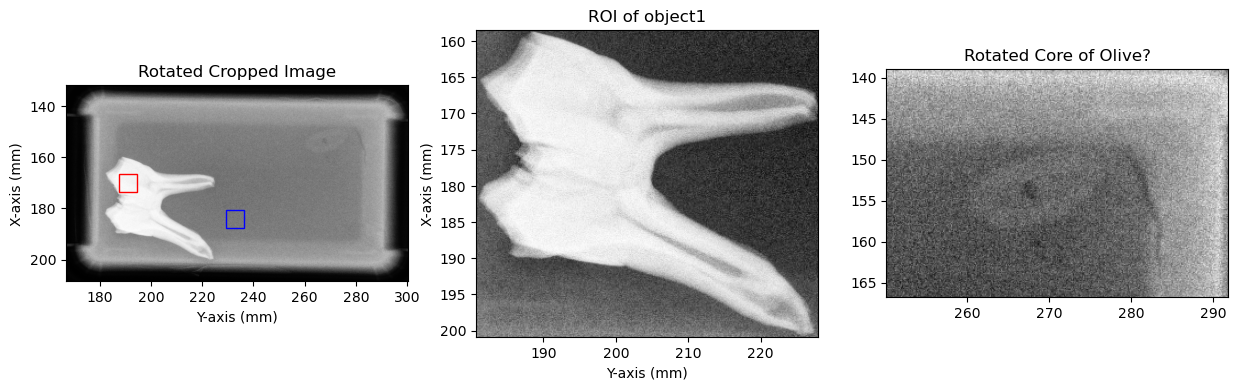

In [ ]:
#type(Xray_phantom_data) -> numpy.ndarray

rows = 1
columns = 3
fig = plt.figure(figsize=(15, 10))
extent = [
    0,  # Start of X-axis in mm
    Xray_phantom_data.shape[1] * pixel_size_x,  # End of X-axis in mm
    Xray_phantom_data.shape[0] * pixel_size_y,  # End of Y-axis in mm
    0,  # Start of Y-axis in mm
]

cropped_image = Xray_phantom_data[950:1500, 1200:2160]
cropped_teeth = Xray_phantom_data[1150:1442, 1307:1618]
cropped_core = Xray_phantom_data[1000:1200,1800:2100]

cropped_image_extent = [
    1200 * pixel_size_x,  # Start of X in mm
    2160 * pixel_size_x,  # End of X in mm
    1500 * pixel_size_y,  # End of Y in mm
    950 * pixel_size_y,   # Start of Y in mm
]

cropped_teeth_extent = [
    1300 * pixel_size_x,  # Start of X in mm
    1640 * pixel_size_x,  # End of X in mm
    1445 * pixel_size_y,  # End of Y in mm
    1140 * pixel_size_y,  # Start of Y in mm
]

cropped_core_extent = [
    1800 * pixel_size_x,  # Start of X in mm
    2100 * pixel_size_x,  # End of X in mm
    1200 * pixel_size_y,  # End of Y in mm
    1000 * pixel_size_y,  # Start of Y in mm
]

signal_rect = patches.Rectangle(
    (1350 * pixel_size_x, 1200 * pixel_size_y),  # Convert pixel coordinates to mm
    50 * pixel_size_x,  # Width in mm
    50 * pixel_size_y,  # Height in mm
    linewidth=1,
    edgecolor="r",
    facecolor="none",
)
noise_rect = patches.Rectangle(
    (1650 * pixel_size_x, 1300 * pixel_size_y),  # Convert pixel coordinates to mm
    50 * pixel_size_x,  # Width in mm
    50 * pixel_size_y,  # Height in mm
    linewidth=1,
    edgecolor="b",
    facecolor="none",
)

# Plot the rotated cropped image
ax1 = fig.add_subplot(rows, columns, 1)
ax1.imshow(cropped_image, cmap="gray", extent=cropped_image_extent, aspect='equal')
ax1.add_patch(signal_rect)
ax1.add_patch(noise_rect)

ax1.set_xlabel("Y-axis (mm)")
ax1.set_ylabel("X-axis (mm)")
plt.title("Rotated Cropped Image")

# Plot the rotated cropped teeth
ax2 = fig.add_subplot(rows, columns, 2)
ax2.imshow(cropped_teeth, cmap="gray", extent=cropped_teeth_extent, aspect='equal')
ax2.set_xlabel("Y-axis (mm)")
ax2.set_ylabel("X-axis (mm)")
plt.title("ROI of object1")

# Plot the rotated cropped core
ax3 = fig.add_subplot(rows, columns, 3)
ax3.imshow(cropped_core, cmap="gray", extent=cropped_core_extent, aspect='equal')
plt.title("Rotated Core of Olive?")

### SNR of tooth

mean of red: 3887.5604
mean of blue: 133.87236602077368
Signal-to-Noise Ratio (SNR): 29.039304492435328


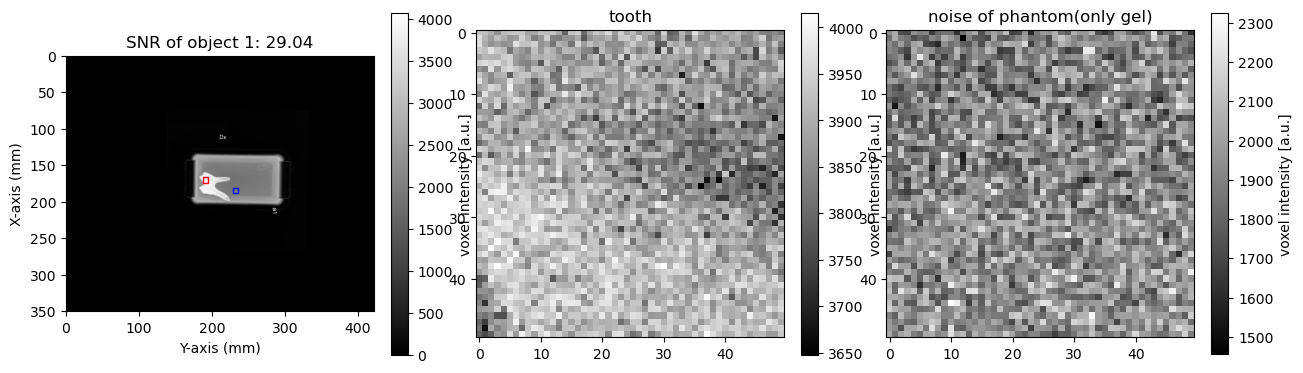

In [ ]:
rows = 1
columns = 3
fig = plt.figure(figsize=(15, 10))


cropped_tooth = Xray_phantom_data[1200:1250, 1350:1400]#1140:1445, 1300:1640
cropped_noise = Xray_phantom_data[1300:1350, 1650:1700]#[1300:1350, 1700:1750]

signal_rect = patches.Rectangle(
    (1350 * pixel_size_x, 1200 * pixel_size_y),  # Convert pixel coordinates to mm
    50 * pixel_size_x,  # Width in mm
    50 * pixel_size_y,  # Height in mm
    linewidth=1,
    edgecolor="r",
    facecolor="none",
)
noise_rect = patches.Rectangle(
    (1650 * pixel_size_x, 1300 * pixel_size_y),  # Convert pixel coordinates to mm
    50 * pixel_size_x,  # Width in mm
    50 * pixel_size_y,  # Height in mm
    linewidth=1,
    edgecolor="b",
    facecolor="none",
)

extent = [
    0,  # Start of X-axis in mm
    Xray_phantom_data.shape[1] * pixel_size_x,  # End of X-axis in mm
    Xray_phantom_data.shape[0] * pixel_size_y,  # End of Y-axis in mm
    0,  # Start of Y-axis in mm
]

ax1=fig.add_subplot(rows, columns, 1)
figuncrop = plt.imshow(Xray_phantom_data,cmap="grey", extent=extent)
plt.colorbar(figuncrop, fraction=0.05, pad=0.05, label="voxel intensity [a.u.]")
ax1.set_title("SNR of object 1: 29.04")
ax1.add_patch(signal_rect)
ax1.add_patch(noise_rect)
ax1.set_xlabel("Y-axis (mm)")
ax1.set_ylabel("X-axis (mm)")


fig.add_subplot(rows,columns,2)
figcrop = plt.imshow(cropped_tooth,cmap="grey")
plt.colorbar(figcrop, fraction=0.05, pad=0.05, label="voxel intensity [a.u.]")
plt.title("tooth")

fig.add_subplot(rows,columns,3)
figcrop = plt.imshow(cropped_noise,cmap="grey")
plt.colorbar(figcrop, fraction=0.05, pad=0.05, label="voxel intensity [a.u.]")
plt.title("noise of phantom(only gel)")


# Calculate mean and standard deviation
mean_signal = np.mean(cropped_tooth)
std_noise = np.std(cropped_noise)
print(f'mean of red: {mean_signal}')
print(f'mean of blue: {std_noise}')

# Calculate SNR
snr = mean_signal / std_noise
print(f'Signal-to-Noise Ratio (SNR): {snr}')




### Find SNR of olive core


mean of red: 2074.9548
mean of blue: 133.87236602077368
Signal-to-Noise Ratio (SNR): 15.499500469559328


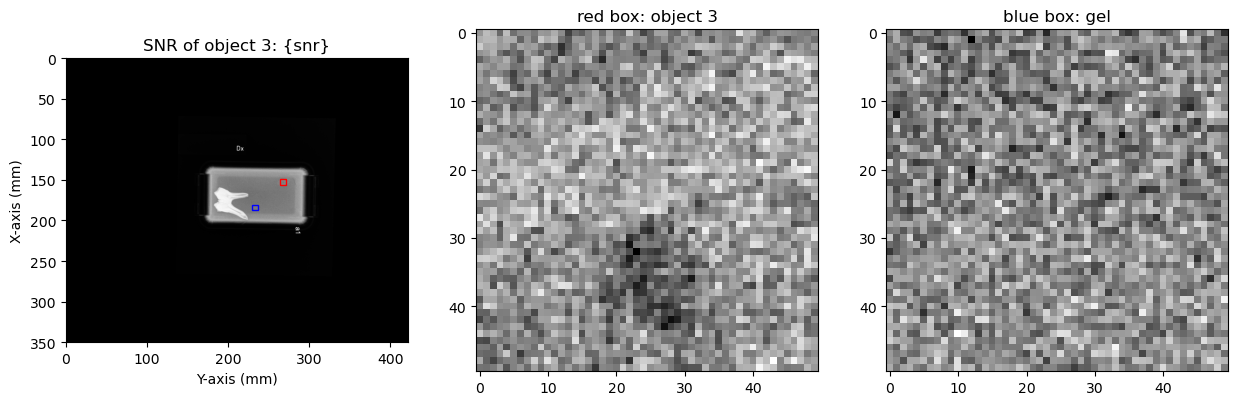

In [ ]:
rows = 1
columns = 3
fig = plt.figure(figsize=(15, 10))

cropped_noise = Xray_phantom_data[1300:1350, 1650:1700]#[1300:1350, 1700:1750]
cropped_nut = Xray_phantom_data[1070:1120, 1900:1950]#[1300:1350, 1700:1750]

signal_rect = patches.Rectangle(
    (1650 * pixel_size_x, 1300 * pixel_size_y),  # Convert pixel coordinates to mm
    50 * pixel_size_x,  # Width in mm
    50 * pixel_size_y,  # Height in mm
    linewidth=1,
    edgecolor="b",
    facecolor="none",
)
noise_rect = patches.Rectangle(
    (1900 * pixel_size_x, 1070 * pixel_size_y),  # Convert pixel coordinates to mm
    50 * pixel_size_x,  # Width in mm
    50 * pixel_size_y,  # Height in mm
    linewidth=1,
    edgecolor="r",
    facecolor="none",
)


extent = [
    0,  # Start of X-axis in mm
    Xray_phantom_data.shape[1] * pixel_size_x,  # End of X-axis in mm
    Xray_phantom_data.shape[0] * pixel_size_y,  # End of Y-axis in mm
    0,  # Start of Y-axis in mm
]

ax1=fig.add_subplot(rows, columns, 1)
figuncrop = plt.imshow(Xray_phantom_data,cmap="grey",extent=extent)
ax1.set_title("SNR of object 3: "'{snr}')
ax1.add_patch(signal_rect)
ax1.add_patch(noise_rect)
ax1.set_xlabel("Y-axis (mm)")
ax1.set_ylabel("X-axis (mm)")

fig.add_subplot(rows,columns,2)
figcrop = plt.imshow(cropped_nut,cmap="grey")
plt.title("red box: object 3")

fig.add_subplot(rows,columns,3)
figcrop = plt.imshow(cropped_noise,cmap="grey")
plt.title("blue box: gel")


# Calculate mean and standard deviation
mean_signal = np.mean(cropped_nut)
std_noise = np.std(cropped_noise)
print(f'mean of red: {mean_signal}')
print(f'mean of blue: {std_noise}')

# Calculate SNR
snr = mean_signal / std_noise
print(f'Signal-to-Noise Ratio (SNR): {snr}')



### SNR of carrot

mean of red: 1861.03
mean of blue: 133.87236602077368
Signal-to-Noise Ratio (SNR): 13.901524678447934


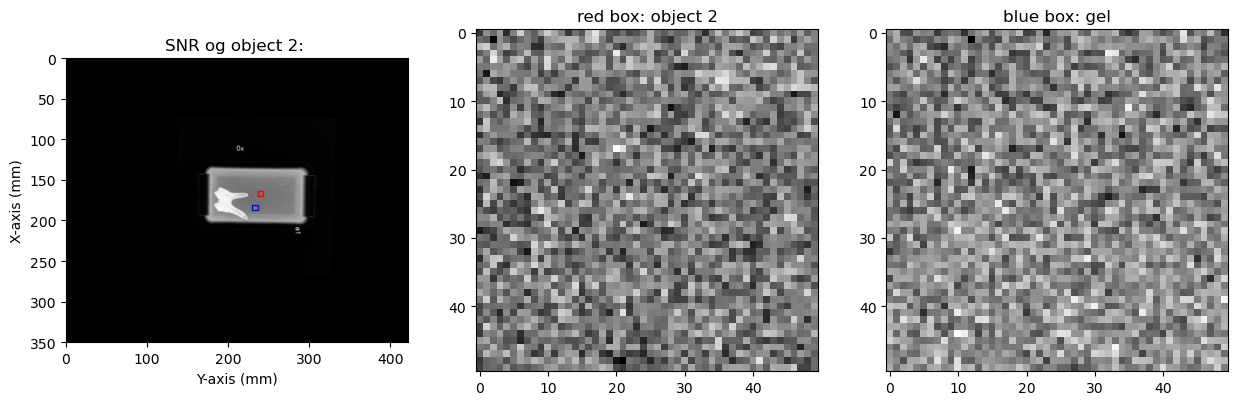

In [ ]:
rows = 1
columns = 3
fig = plt.figure(figsize=(15, 10))

cropped_carrot = Xray_phantom_data[1175:1225, 1700:1750]#[1300:1350, 1700:1750]
cropped_noise = Xray_phantom_data[1300:1350, 1650:1700]#[1300:1350, 1700:1750]

noise_rect = patches.Rectangle(
    (1650 * pixel_size_x, 1300 * pixel_size_y),  # Convert pixel coordinates to mm
    50 * pixel_size_x,  # Width in mm
    50 * pixel_size_y,  # Height in mm
    linewidth=1,
    edgecolor="b",
    facecolor="none",
)
signal_rect = patches.Rectangle(
    (1700 * pixel_size_x, 1175 * pixel_size_y),  # Convert pixel coordinates to mm
    50 * pixel_size_x,  # Width in mm
    50 * pixel_size_y,  # Height in mm
    linewidth=1,
    edgecolor="r",
    facecolor="none",
)

extent = [
    0,  # Start of X-axis in mm
    Xray_phantom_data.shape[1] * pixel_size_x,  # End of X-axis in mm
    Xray_phantom_data.shape[0] * pixel_size_y,  # End of Y-axis in mm
    0,  # Start of Y-axis in mm
]

ax1=fig.add_subplot(rows, columns, 1)
figuncrop = plt.imshow(Xray_phantom_data,cmap="grey",extent=extent)
ax1.set_title("SNR og object 2: ")
ax1.add_patch(signal_rect)
ax1.add_patch(noise_rect)
ax1.set_xlabel("Y-axis (mm)")
ax1.set_ylabel("X-axis (mm)")

fig.add_subplot(rows,columns,2)
figcrop = plt.imshow(cropped_carrot,cmap="grey")
plt.title("red box: object 2")

fig.add_subplot(rows,columns,3)
figcrop = plt.imshow(cropped_noise,cmap="grey")
plt.title("blue box: gel")


# Calculate mean and standard deviation
mean_signal = np.mean(cropped_carrot)
std_noise = np.std(cropped_noise)
print(f'mean of red: {mean_signal}')
print(f'mean of blue: {std_noise}')

# Calculate SNR
snr = mean_signal / std_noise
print(f'Signal-to-Noise Ratio (SNR): {snr}')



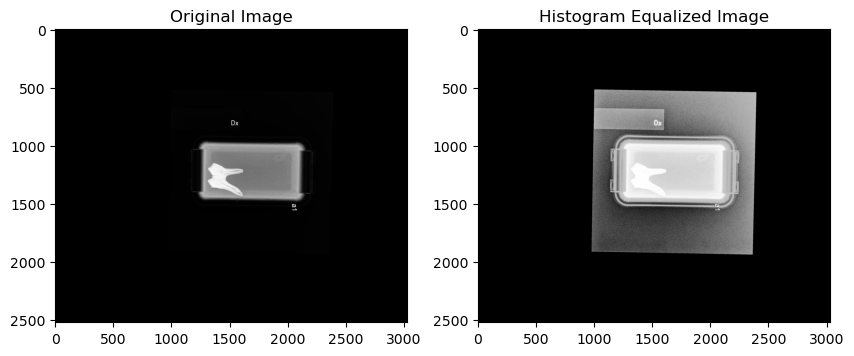

In [56]:
from skimage import exposure

# Apply histogram equalization
image_equalized = exposure.equalize_hist(Xray_phantom_data)

# Plot the original and equalized images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(Xray_phantom_data, cmap='gray')
axes[0].set_title("Original Image")
axes[1].imshow(image_equalized, cmap='gray')
axes[1].set_title("Histogram Equalized Image")
plt.show()
